In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('E:\python practice\hate_speech_dataset.csv')
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.drop(columns=["Unnamed: 0","count","offensive_language","neither","class"],axis=1,inplace=True)

In [4]:
df.head(2)

,hate_speech,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [5]:
df['hate_speech'].replace({2:0,3:1,4:0,5:1,6:1,7:1},inplace=True)
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
df.head(90)

,hate_speech,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
86,0,"""@BrokenPiecesmsc: @ItsNotAdam faggot read my ..."
87,0,"""@BrosConfessions: This bitch was so ungratefu..."
88,0,"""@CASHandBOOBIES: I been kidnapped yo bitch"""


In [6]:
df['hate_speech']

0        0
1        0
2        0
3        0
4        0
        ..
24778    0
24779    0
24780    0
24781    0
24782    0
Name: hate_speech, Length: 24783, dtype: int64

In [7]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^-9A-Za-z]', ' ', df['tweet'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)
 

[nltk_data] Downloading package stopwords to C:\Users\Amjad Net
[nltk_data]     Cafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
    
cv = CountVectorizer(max_features = 300)
x=cv.fit_transform(corpus).toarray()
#X = cv.fit_transform(corpus).toarray()
#xtrain_count.toarray()[:6]
#y=pd.get_dummies(df['hate_speech'])
#y = y.iloc[:,1].values

y=df['hate_speech']

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7896913455719184

In [11]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(xtrain, ytrain)
clf_gini.score(xtest,ytest)

0.849808351825701

In [12]:
ypred=clf.predict(xtest)
ypred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score


In [14]:
cm=confusion_matrix(ytest,ypred)
cm


array([[7500,  931],
       [1154,  329]], dtype=int64)

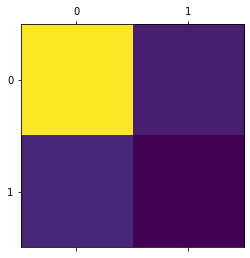

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.matshow(cm)

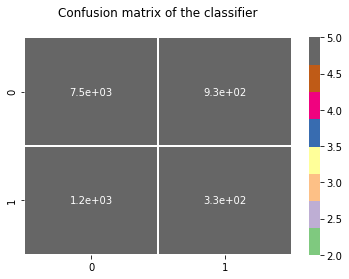

In [16]:
#plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
sn.heatmap(cm, annot=True,vmin=2, vmax=5,cmap='Accent', fmt='.2g', linewidths=0.5,linecolor='white',cbar=True,cbar_kws=None,
    cbar_ax=None)
plt.show()

In [19]:
accu_scr_dt=accuracy_score(ytest,ypred)
print(accu_scr_dt)

prec_scr_dt=precision_score(ytest,ypred)
print(prec_scr_dt)

recall_scr_dt=recall_score(ytest,ypred)
print(recall_scr_dt)

0.7896913455719184
0.2611111111111111
0.22184760620364127
